In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## porcentaje de valores na

In [7]:
(df.isna().sum()/df.count())*100

Date              0.000000
Location          0.000000
MinTemp           1.031429
MaxTemp           0.874486
Rainfall          2.293265
Evaporation      75.952583
Sunshine         92.343802
WindGustDir       7.641304
WindGustSpeed     7.591145
WindDir9am        7.832817
WindDir3pm        2.993656
WindSpeed9am      1.229705
WindSpeed3pm      2.150311
Humidity9am       1.858465
Humidity3pm       3.197520
Pressure9am      11.553357
Pressure3pm      11.521712
Cloud9am         62.394498
Cloud3pm         68.939165
Temp9am           1.229705
Temp3pm           2.544219
RainToday         2.293265
RainTomorrow      2.297581
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [8]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

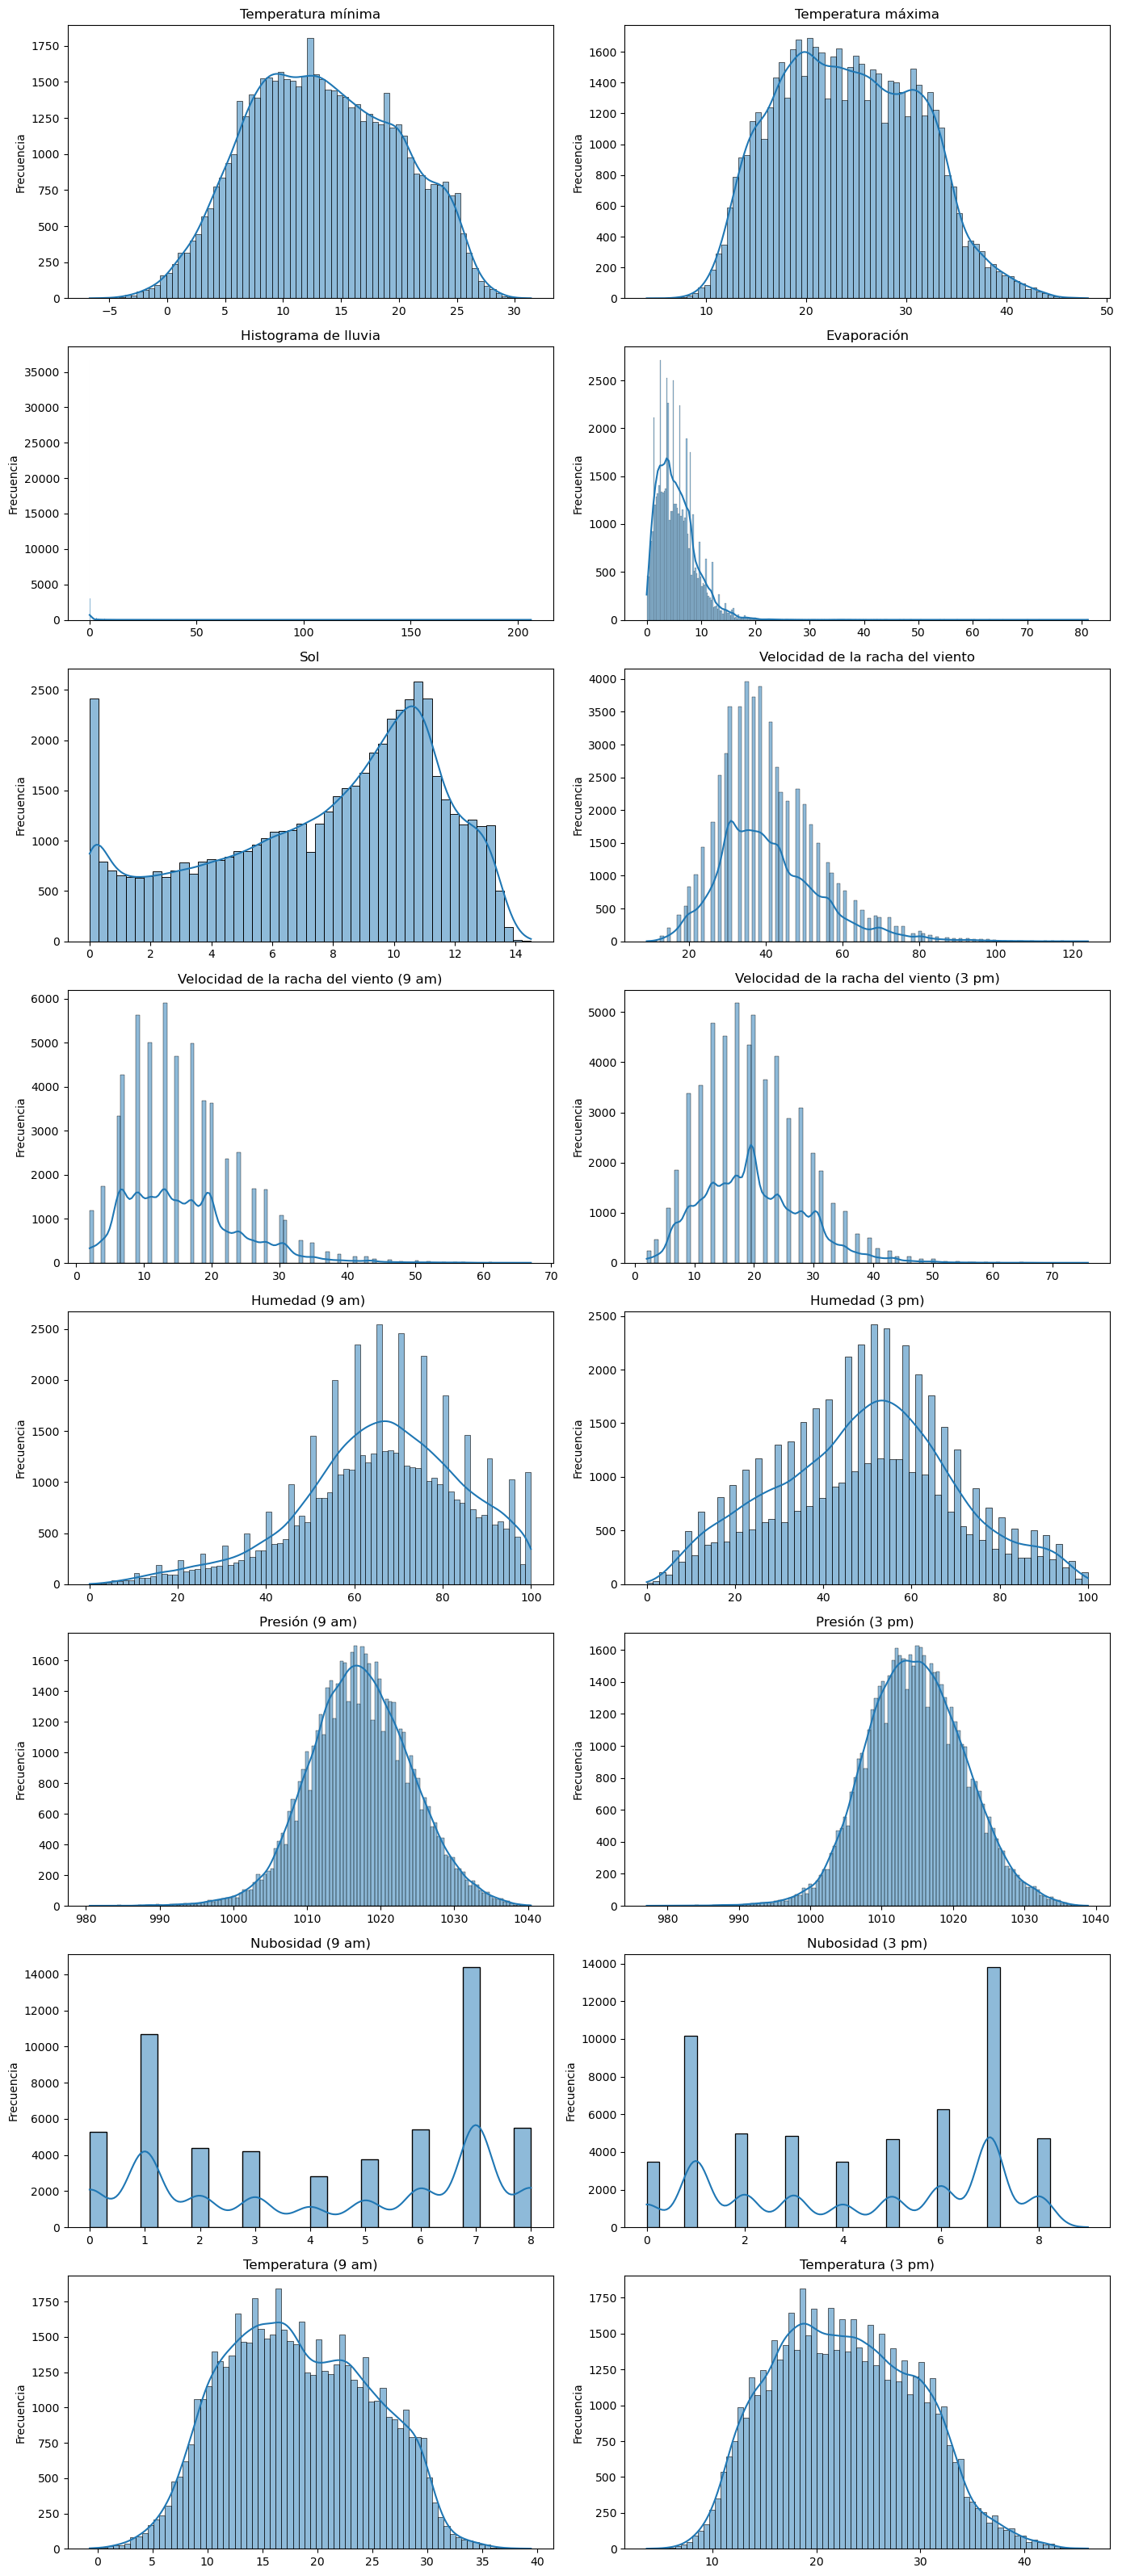

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n = df.select_dtypes(include='number')

num_cols = n.columns.size
num_rows = (num_cols + 1) // 2 
fig, axes = plt.subplots(num_rows, 2, figsize=(14, 4 * num_rows))
axes = axes.flatten()  
for i, col in enumerate(n.columns):
    sns.histplot(n[col], ax=axes[i], kde=True)  
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')
    if col == "MinTemp":
        axes[i].set_title(f'Temperatura mínima')
    elif col == "MaxTemp":
            axes[i].set_title(f'Temperatura máxima')
    elif col == "Rainfall":
            axes[i].set_title(f'Histograma de lluvia')
    elif col=="Evaporation":    
        axes[i].set_title(f'Evaporación')
    elif col=="Sunshine":    
        axes[i].set_title(f'Sol')
    elif col=="WindGustDir":    
        axes[i].set_title(f'Dirección de la racha del viento')
    elif col=="WindGustSpeed":    
        axes[i].set_title(f'Velocidad de la racha del viento')
    elif col=="WinDir9am":    
        axes[i].set_title(f'Dirección de la racha del viento (9 am) ')
    elif col=="WindDir3pm":    
        axes[i].set_title(f'Dirección de la racha del viento (3 pm)')
    elif col=="WindSpeed9am":    
        axes[i].set_title(f'Velocidad de la racha del viento (9 am)')
    elif col=="WindSpeed3pm":    
        axes[i].set_title(f'Velocidad de la racha del viento (3 pm)')
    elif col=="Humidity9am":    
        axes[i].set_title(f'Humedad (9 am) ')
    elif col=="Humidity3pm":    
        axes[i].set_title(f'Humedad (3 pm)')
    elif col=="Pressure9am":    
        axes[i].set_title(f'Presión (9 am) ')
    elif col=="Pressure3pm":    
        axes[i].set_title(f'Presión (3 pm) ')
    elif col=="Cloud9am":    
        axes[i].set_title(f'Nubosidad (9 am)')
    elif col=="Cloud3pm":    
        axes[i].set_title(f'Nubosidad (3 pm)')
    elif col=="Temp9am":    
        axes[i].set_title(f'Temperatura (9 am)')
    elif col=="Temp3pm":    
        axes[i].set_title(f'Temperatura (3 pm)')
    elif col=="RainToday":    
        axes[i].set_title(f'Pluviosidad hoy ')
    elif col=="RainTomorrow":    
        axes[i].set_title(f'Pluviosidad mañana')

if num_cols % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()



In [10]:
df2=df.groupby("Location").mean()

C:\Users\esco1\AppData\Local\Temp\ipykernel_23048\3103823167.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby("Location").mean()


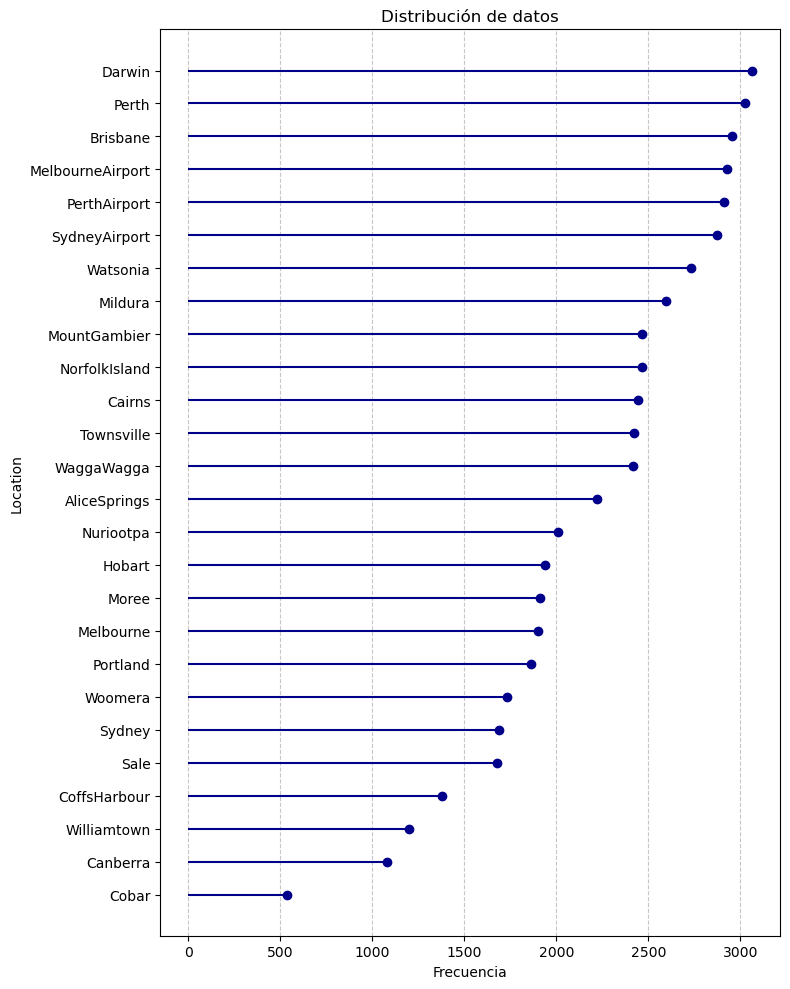

In [11]:
value_counts = df['Location'].value_counts()

value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Location', 'count']

value_counts_df.sort_values('count', ascending=True, inplace=True)

plt.figure(figsize=(8, 10))

plt.hlines(y=value_counts_df['Location'], xmin=0, xmax=value_counts_df['count'], color='darkblue')

plt.plot(value_counts_df['count'], value_counts_df['Location'], 'o', color='darkblue')

plt.xlabel('Frecuencia')
plt.ylabel('Ciudad')
plt.title('Distribución de datos')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\esco1\AppData\Local\Temp\ipykernel_23048\1095577018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True, center=0)


<Axes: >

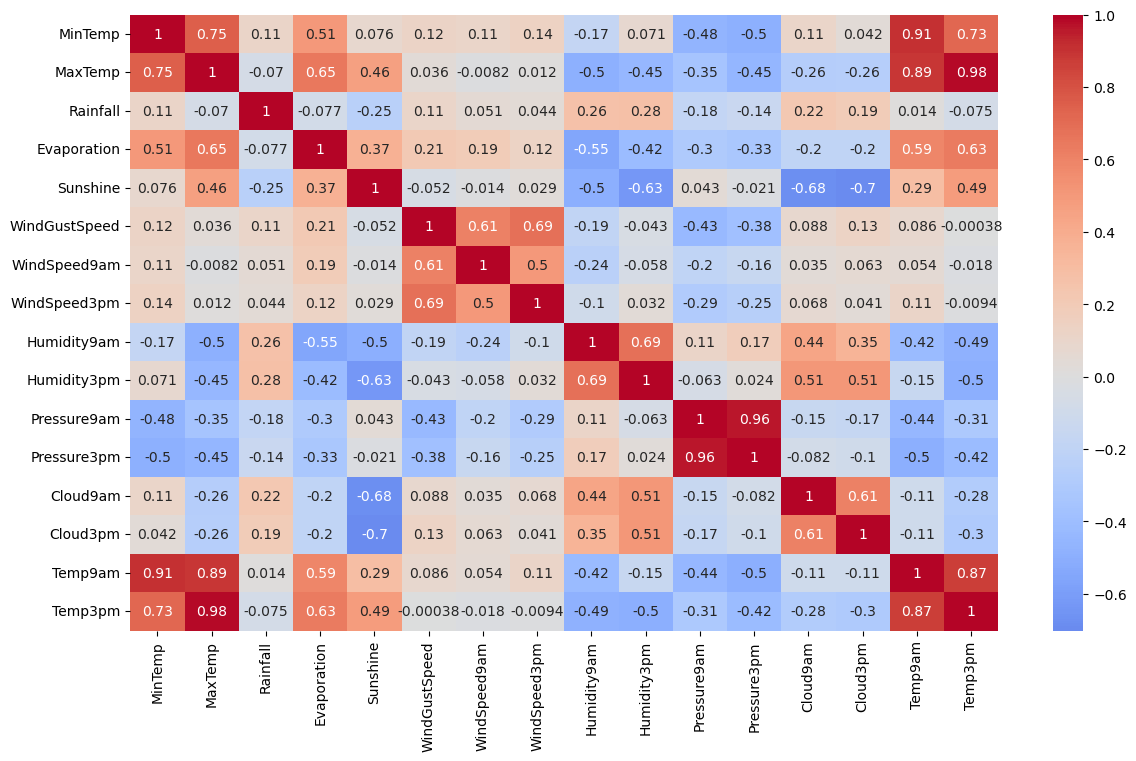

In [12]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, center=0)

In [15]:
print(df2)

                    MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                                  
AliceSprings      13.878093  29.724921  0.955556     9.017994  9.539316   
Brisbane          16.365628  26.436810  2.855401     5.444836  8.171182   
Cairns            21.129296  29.551596  4.522259     6.030401  7.664362   
Canberra           7.727829  20.363822  1.906957     4.329314  7.399536   
Cobar             13.828090  26.225281  1.182397     6.648315  8.728839   
CoffsHarbour      14.485000  23.766304  3.885942     3.882464  7.443261   
Darwin            23.166492  32.559536  4.038210     6.318746  8.596571   
Hobart             8.957091  17.783961  1.624033     3.632749  6.681227   
Melbourne         11.672445  20.590253  1.912118     4.534668  6.357271   
MelbourneAirport   9.958313  20.494537  1.455787     4.660703  6.419426   
Mildura           10.914225  24.957440  0.935235     6.013955  8.503662   
Moree             12.8767

In [18]:
coord = pd.read_csv("coordinates.csv",delimiter=",")